<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Homework - Feature Engineering</h2>
<h4>DAT-5390 | Computational Analytics with Python</h4>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Team: TEAM 2

In [9]:
# package imports
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # enhanced data visualization
import warnings                 # warnings


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# suppressing warnings
warnings.filterwarnings(action = 'ignore')

file = "./hw_feature_engineering.xlsx"

housing_df = pd.read_excel(file)

# code will not produce an output###

In [10]:
housing_df

,property_id,Lot_Area,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Garage_Area,Porch_Area,Overall_Qual,Overall_Cond,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars,Sale_Price,log_Sale_Price
0,1,31770,112,1080,1656,0,1656,528,272,6,5,1,0,1,7,2,2,215000,12.278398
1,2,11622,0,882,896,0,896,730,260,5,6,1,0,1,5,0,1,105000,11.561725
2,3,14267,108,1329,1329,0,1329,312,429,6,6,1,1,1,6,0,1,172000,12.055256
3,4,11160,0,2110,2110,0,2110,522,0,7,5,2,1,1,8,2,2,244000,12.404928
4,5,13830,0,928,928,701,1629,482,246,5,5,2,1,1,6,1,2,189900,12.154258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,7937,0,1003,1003,0,1003,588,120,6,6,1,0,1,6,0,2,142500,11.867104
2926,2927,8885,0,864,902,0,902,484,164,5,5,1,0,1,5,0,2,131000,11.782960
2927,2928,10441,0,912,970,0,970,0,112,5,5,1,0,1,6,0,0,132000,11.790565
2928,2929,10010,0,1389,1389,0,1389,418,278,5,5,1,0,1,6,1,2,170000,12.043560


<br>

In [11]:
# missing value imputation (a simple strategy is fine for this assignment)

# summing together the results of missing values per feature

housing_df.isnull().sum()

property_id       0
Lot_Area          0
Mas_Vnr_Area      0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Garage_Area       0
Porch_Area        0
Overall_Qual      0
Overall_Cond      0
Full_Bath         0
Half_Bath         0
Kitchen_AbvGr     0
TotRms_AbvGr      0
Fireplaces        0
Garage_Cars       0
Sale_Price        0
log_Sale_Price    0
dtype: int64

no missing values found

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Step 1: Hypothesize on Features to Engineer</h3><br>
<strong>a)</strong> Write a hypothesis on the effect you believe each new feature will have on the response variable (strong positive correlation, etc.). You may choose to hypothesize on either <em>Sale_Price</em> or <em>log_Sale_Price</em> (you will test your engineered features on both). (minimum 3 sentences per feature)
<br><br>
<strong>b)</strong> Give a practical, real world explanation as to why you feel each new feature adds value. (minimum of 2 sentences per feature)

1.⁠ ⁠Total Living Area:



H1: There is a strong positive correlation between the total livable area of a property and its sale price. Adding a feature like Total Livable Area (the combined size of all livable spaces in a property, including the first floor, second floor, and finished basement) directly influences the Sale Price because it represents the usable and functional space available to the homeowner. This is one of the most critical aspects buyers consider when assessing the value of a property.

Spacious homes are often viewed as a good investment because they provide more room for various activities, such as family gatherings, workspaces, or relaxation. While their purchase price may be higher, buyers often find that the more square footage justifies the cost, which offers flexibility and functionality. In addition, bigger homes are especially attractive to families planning for future needs, as they provide the space necessary to accommodate changes like new family members or evolving personal interests.



Gomez, J. (2022, June 4). 8 critical factors that influence a home’s value
Reading Time — 8 minutes June 4, 2022. Opendoor. Retrieved January 27, 2025, from https://www.opendoor.com/articles/factors-that-influence-home-value

Quiz, K. (2024, September 13). The Economics of Home Size: Is Bigger Always Better?. Concreit. Retrieved January 27, 2025, from https://www.concreit.com/blog/is-bigger-house-better







2.⁠ ⁠Exterior : Porch and Garage Area Combined:

H2: The exterior, which is the combined porch and garage area, is expected to have a positive correlation with sale price. Buyers value these features for their practical uses, such as parking, storage, and additional functional space for outdoor activities. Furthermore, these exterior features enhance the home's curb appeal, making it more visually appealing and competitive in the market, which can attract higher offers.

A house with a large porch offers homeowners a welcoming space to relax outdoors, entertain guests, or add furniture for aesthetic appeal. Similarly, a spacious garage provides secure parking and additional storage, increasing the home's overall utility, especially for families or car enthusiasts. That being said, properties with these features stand out, as they offer both functional benefits and visual appeal to potential buyers.

Ortega, M. (2024, July 17). Exterior Home Upgrades That Pay Off When You Sell. Zillow. Retrieved January 27, 2025, from https://www.zillow.com/learn/exterior-home-improvements/





3.⁠ ⁠Luxury Indicator:

The Luxury Indicator, which includes high-end features such as fireplaces, superior quality (Overall_Qual ≥ 8), and larger living spaces (Gr_Liv_Area > 2000), is hypothesized to have a strong positive correlation with sale price. Fireplaces are often associated with luxury and comfort, making a home more attractive to buyers who value aesthetics and ambiance. Similarly, superior quality and spacious layouts appeal to buyers willing to pay a premium for properties that reflect exclusivity.

A home with multiple fireplaces, high-quality finishes such as custom cabinetry or hardwood floors stands out as a luxury property. Moreover, on average, luxury homes in San Diego range from 1,177-6,540 square feet. For this reason, we have defined the Gross Living Area to be over 2000 square feet. According to the US Fireplace Store, fireplaces not only create a cozy and visually appealing atmosphere but can also add significant value to a home, with some estimates suggesting up to a 12% increase in resale value. Homes featuring these elements attract buyers looking for a blend of comfort, functionality, and sophistication, commanding higher market prices.

US Fireplace Store. (n.d.). Will Adding a Fireplace Increase My Home’s Value?
Retrieved January 27, 2025, from https://usfireplacestore.com/blogs/learning-center/do-fireplaces-add-home-value

Nicki & Karen. (2020, March 2). What defines a luxury home in Southern California? Nicki & Karen. Retrieved January 27, 2025, from https://nickiandkaren.com/ask-a-realtor/what-defines-luxury-home-southern-california/

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 2: Code the New Features</h3><br>
Use the code cells below to develop your new features.

**Feature 1 – ⁠Total Living Area**

Represents the total livable area in a house.


In [16]:
## Feature 1

#sum the variables into one
housing_df['Total_Living_Area'] = housing_df['First_Flr_SF'] + housing_df['Second_Flr_SF'] + housing_df['Total_Bsmt_SF']

#display results
housing_df['Total_Living_Area'].head(n=10)

0    2736
1    1778
2    2658
3    4220
4    2557
5    2530
6    2676
7    2560
8    3211
9    2798
Name: Total_Living_Area, dtype: int64

**Feature 2 -Exterior**

<br>

Sum of Porch_Area and Garage_Area to indicate exterior usability.
Formula: Porch_Garage_Combined = Porch_Area + Garage_Area

In [13]:
## Feature 2 – Exterior : Porch and Garage Area Combined

#Creating the new feature and combining porch area with garage area to reflect the exterior of the house
housing_df['Porch_Garage_Combined'] = housing_df['Porch_Area'] + housing_df['Garage_Area']

#displaying the first ten values of our feature
housing_df['Porch_Garage_Combined'].head(n=10)

0    800
1    990
2    741
3    522
4    728
5    866
6    752
7    732
8    997
9    642
Name: Porch_Garage_Combined, dtype: int64

**Feature 3 - Luxury Indicator**

<br>

In [19]:
## Feature 3 – ⁠Luxury Indicator

# Initialize an empty list to store the luxury indicator values for each property in a simple way as for loop is going to be used
luxury_indicator = []

# Loop through each row in the housing_df DataFrame
for i in range(len(housing_df)):
    if housing_df.loc[i, 'Overall_Qual'] >= 8 and housing_df.loc[i, 'Gr_Liv_Area'] > 2000 and housing_df.loc[i, 'Fireplaces'] > 1:
        # If all conditions are met, append 1 to indicate the property is luxury
        luxury_indicator.append(1)
    else:
        luxury_indicator.append(0)

# Add the 'Luxury_Indicator' list as a new column in the DataFrame
housing_df['Luxury_Indicator'] = luxury_indicator

# Display the first 50 rows of the newly created 'Luxury_Indicator' column
housing_df['Luxury_Indicator'].head(n=50)



0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    1
45    0
46    1
47    0
48    0
49    0
Name: Luxury_Indicator, dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 3: Check the Results</h3><br>
Develop scatterplots and a correlation matrix or a heatmap to show the linear relationships between your three new features and the response variables (<em>Sale_Price</em> AND <em>log_Sale_Price</em>).

**Correlation heatmaps for Feature 1**

 Total Living Area – and the response variables


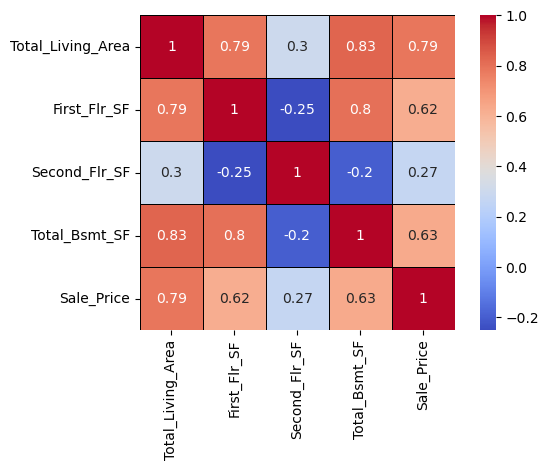

In [38]:
# ⁠Total Living Area and Price

total_living_area_corr = housing_df.loc[:, ['Total_Living_Area',
                                               'First_Flr_SF',
                                               'Second_Flr_SF',
                                               'Total_Bsmt_SF',
                                               'Sale_Price']].corr(method='pearson').round(decimals=2)
# setting a heatmap
sns.heatmap(total_living_area_corr,
            cmap='coolwarm',
            square=True,
            annot=True,
            linecolor='black',
            linewidths=0.5)

# layout and rendering
plt.tight_layout()
plt.show()

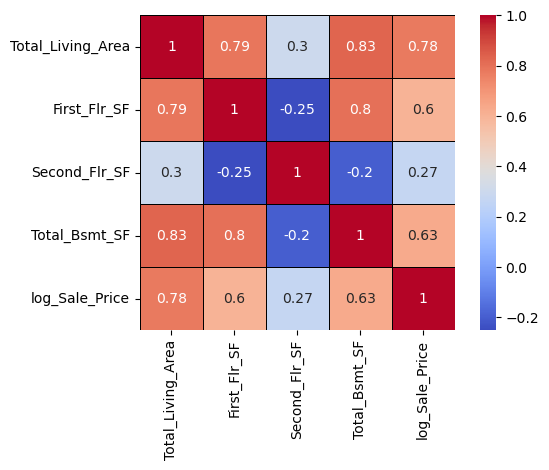

In [35]:
# ⁠Total Living Area and Logarithmic Price

total_living_area_corr = housing_df.loc[:, ['Total_Living_Area',
                                               'First_Flr_SF',
                                               'Second_Flr_SF',
                                               'Total_Bsmt_SF',
                                               'log_Sale_Price']].corr(method='pearson').round(decimals=2)

# setting a heatmap
sns.heatmap(total_living_area_corr,
            cmap='coolwarm',
            square=True,
            annot=True,
            linecolor='black',
            linewidths=0.5)

# layout and rendering
plt.tight_layout()
plt.show()

**Box plot for Feature 1**

⁠Total Living Area and Sale Price



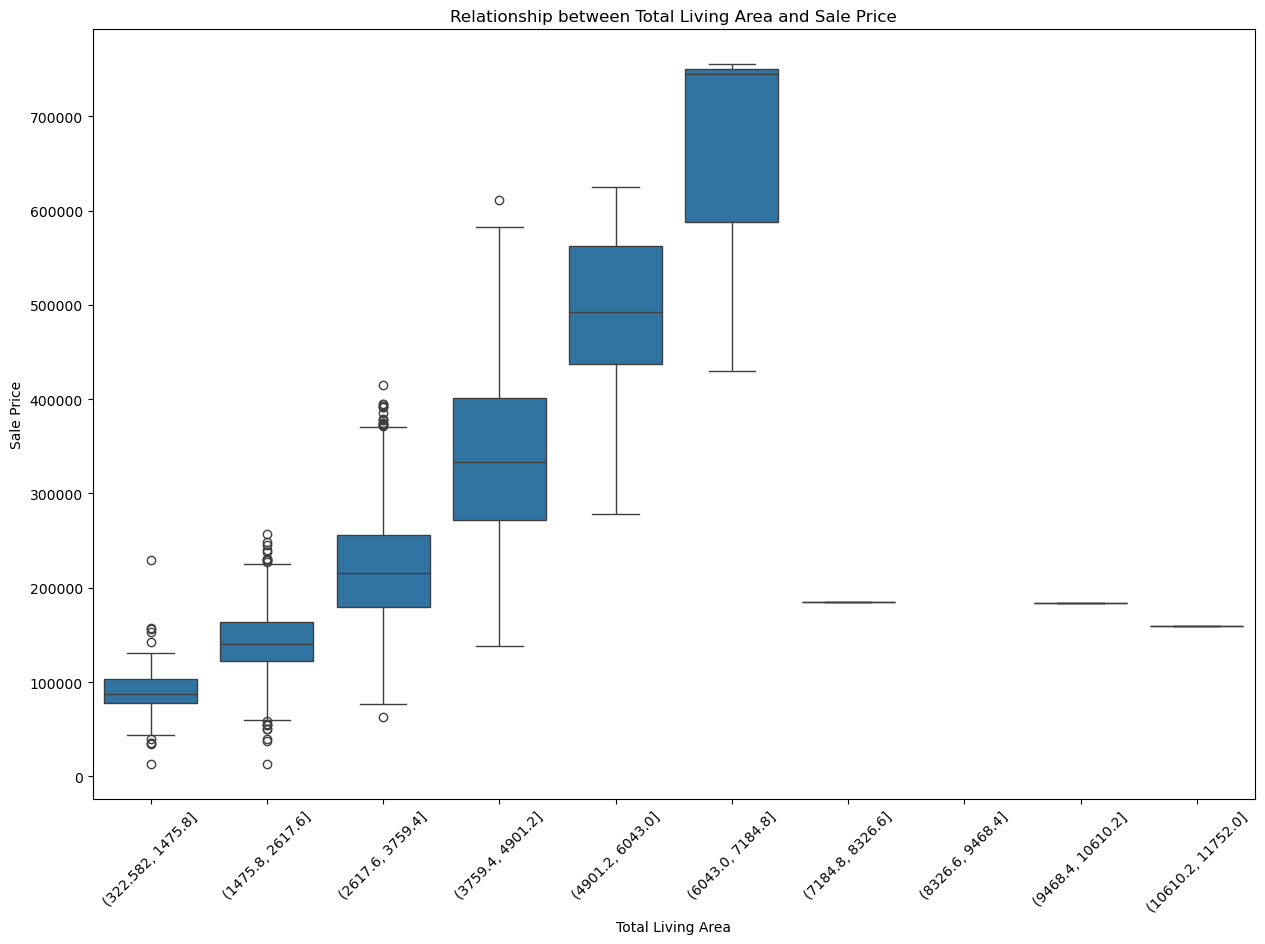

In [25]:
# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))

#group into bins for better visualisation
housing_df['Living_Area_Bins'] = pd.cut(housing_df['Total_Living_Area'], bins=10)


# developing a boxplot
sns.boxplot(x='Living_Area_Bins',
            y='Sale_Price',
            data=housing_df)



# titles and labels
plt.title(label   = 'Relationship between Total Living Area and Sale Price')
plt.xlabel(xlabel = 'Total Living Area')
plt.ylabel(ylabel = 'Sale Price')

# displaying the plot
plt.tight_layout
plt.xticks(rotation=45)
plt.show()




**Scatter plots for Feature 1**

Total Living Area and the response variables



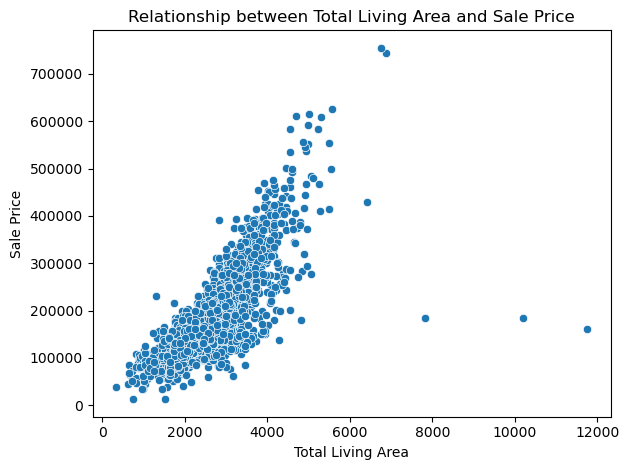

In [23]:
# developing a scatterplot for sale price
sns.scatterplot(x='Total_Living_Area', #naming the x axis
            y='Sale_Price', #naming the y axis
            data=housing_df) #showing housing_df results


plt.title(label   = 'Relationship between Total Living Area and Sale Price')
plt.xlabel(xlabel = 'Total Living Area')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.tight_layout()
plt.show()

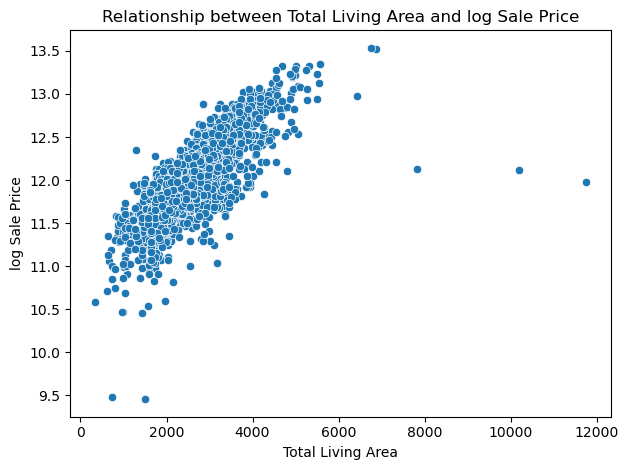

In [24]:
# developing a scatterplot for log price
sns.scatterplot(x='Total_Living_Area', #naming x axis
            y='log_Sale_Price', #naming the y axis 
            data=housing_df) #showing housing df results

plt.title(label   = 'Relationship between Total Living Area and log Sale Price')
plt.xlabel(xlabel = 'Total Living Area')
plt.ylabel(ylabel = 'log Sale Price')


# displaying the plot
plt.tight_layout()
plt.show()

**Correlation heatmaps for Feature 2**

<br>

Exterior and Sale Price 

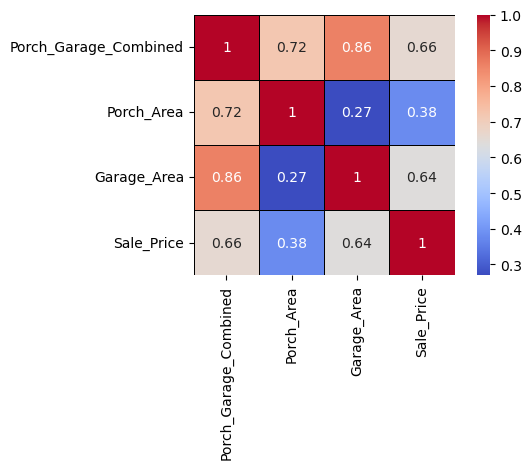

In [36]:
## Scatterplot - Exterior : Porch and Garage Area Combined
#First we calculate the correlation matrix between our feature and the related variables
porch_garage_corr = housing_df.loc[:, ['Porch_Garage_Combined',
                                       'Porch_Area',
                                       'Garage_Area',
                                       'Sale_Price']].corr(method='pearson').round(decimals=2)

#here we create and display the heatmap to see how strong the correlation is
sns.heatmap(porch_garage_corr,
            cmap='coolwarm',
            square=True,
            annot=True,
            linecolor='black',
            linewidths=0.5)

# displaying the plot
plt.tight_layout()
plt.show()





Exterior and Log Sale Price

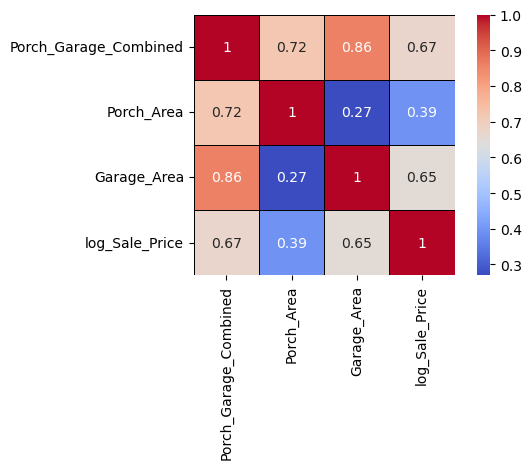

In [37]:
#First we calculate the correlation matrix with Log_Sale_Price and the related variables
porch_garage_corr = housing_df.loc[:, ['Porch_Garage_Combined',
                                       'Porch_Area',
                                       'Garage_Area',
                                       'log_Sale_Price']].corr(method='pearson').round(decimals=2)

#here we create and display the heatmap to see how strong the correlation is
sns.heatmap(porch_garage_corr,
            cmap='coolwarm',
            square=True,
            annot=True,
            linecolor='black',
            linewidths=0.5)

# displaying the plot
plt.tight_layout()
plt.show()


**Boxplot for Feature 2**

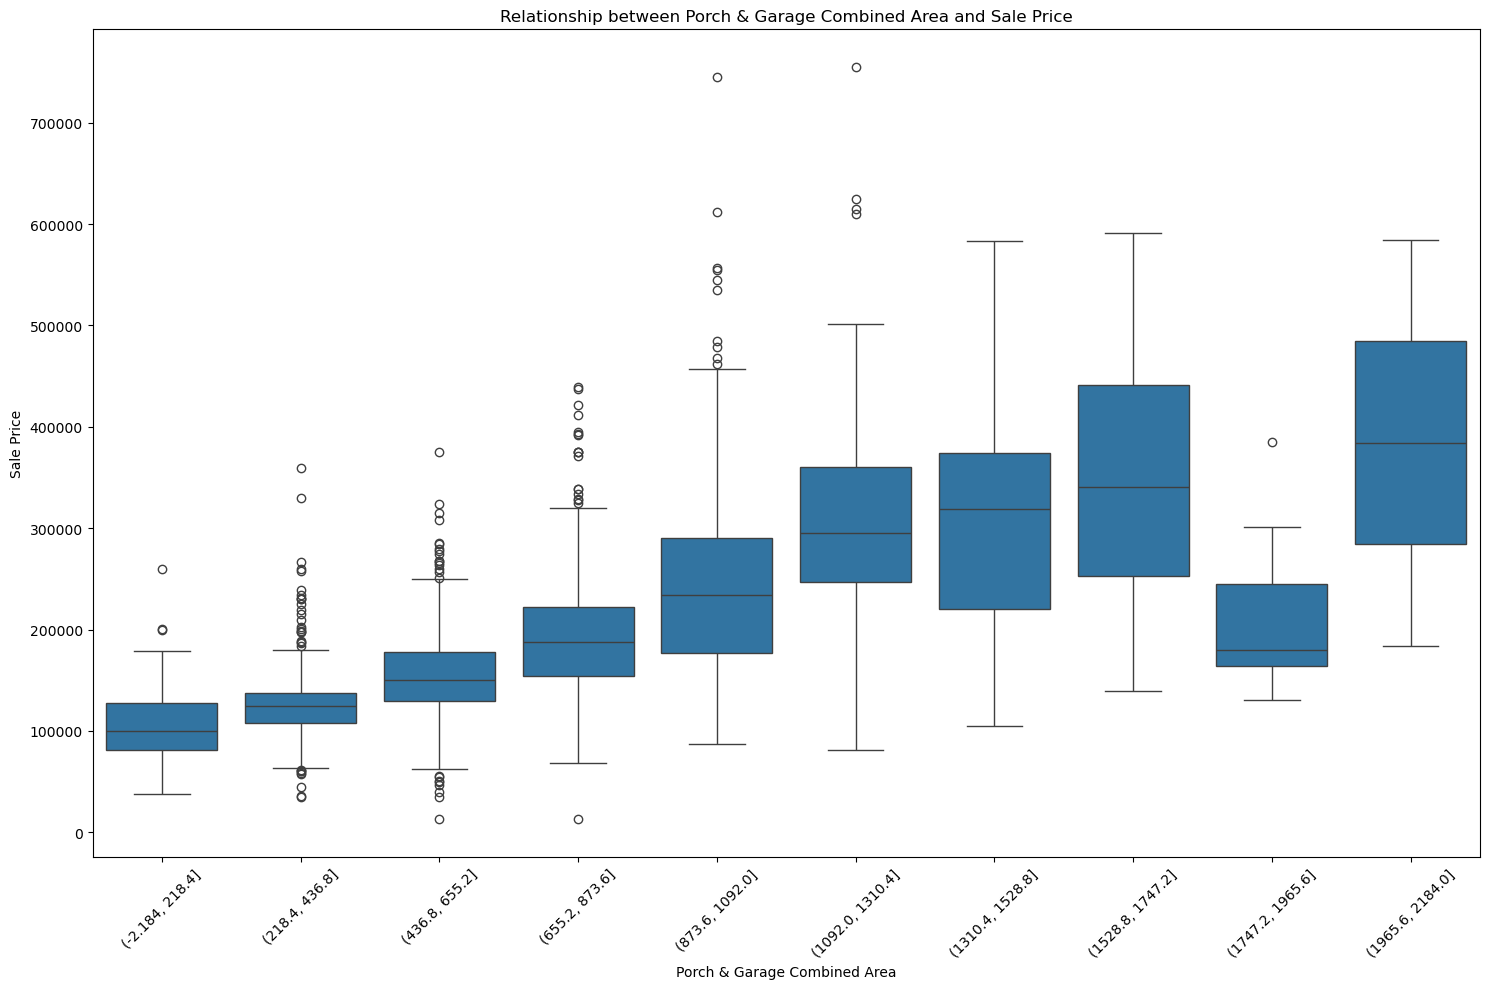

In [26]:
# Boxplot for Porch_Garage_Combined and Sale_Price

fig, ax = plt.subplots(figsize=(15, 10))

# Grouping into bins for better visualization
housing_df['Porch_Garage_Bins'] = pd.cut(housing_df['Porch_Garage_Combined'], bins=10)

#Here we create a boxplot to analyze the relationship between the new feature and sale price
sns.boxplot(x='Porch_Garage_Bins',    #grouping into bins
            y='Sale_Price',           #variable
            data=housing_df)          #our dataframe

#Adding title and labels
plt.title('Relationship between Porch & Garage Combined Area and Sale Price')
plt.xlabel('Porch & Garage Combined Area')
plt.ylabel('Sale Price')
#Adjusting the layout to get better visibility
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Scatterplots for Feature 2**

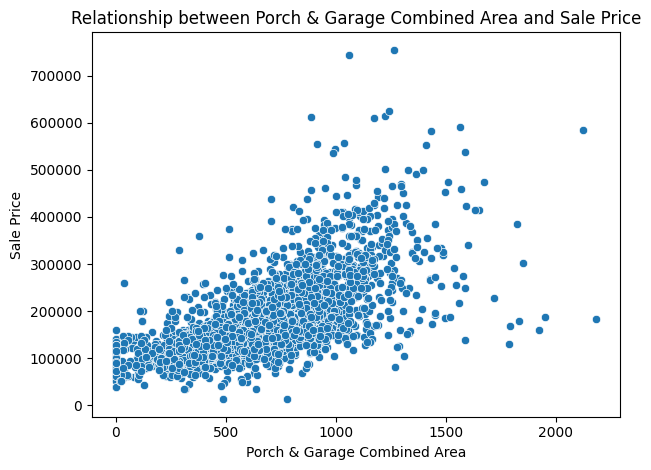

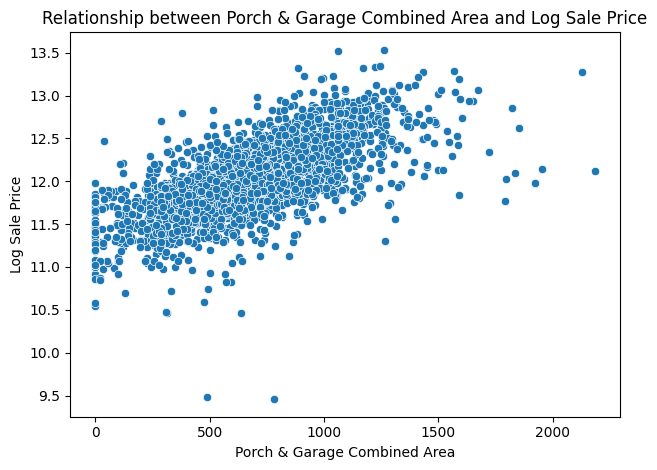

In [ ]:
# Scatter plot: Porch & Garage Combined vs Sale Price
sns.scatterplot(x='Porch_Garage_Combined',
                y='Sale_Price',
                data=housing_df)
#Adding title and labels
plt.title('Relationship between Porch & Garage Combined Area and Sale Price')
plt.xlabel('Porch & Garage Combined Area')
plt.ylabel('Sale Price')
#Adjusting the layout
plt.tight_layout()
plt.show()

# Scatter plot: Porch & Garage Combined vs Log Sale Price
sns.scatterplot(x='Porch_Garage_Combined',
                y='log_Sale_Price',
                data=housing_df)
#Adding title and labels
plt.title('Relationship between Porch & Garage Combined Area and Log Sale Price')
plt.xlabel('Porch & Garage Combined Area')
plt.ylabel('Log Sale Price')
#Adjusting the layout
plt.tight_layout()
plt.show()


**Scatterplots for Feature 3**

<br>

Luxury Indicator with Sale Price and Log Price

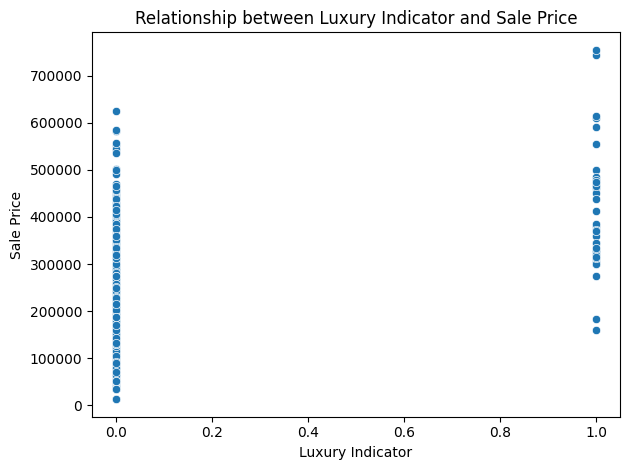

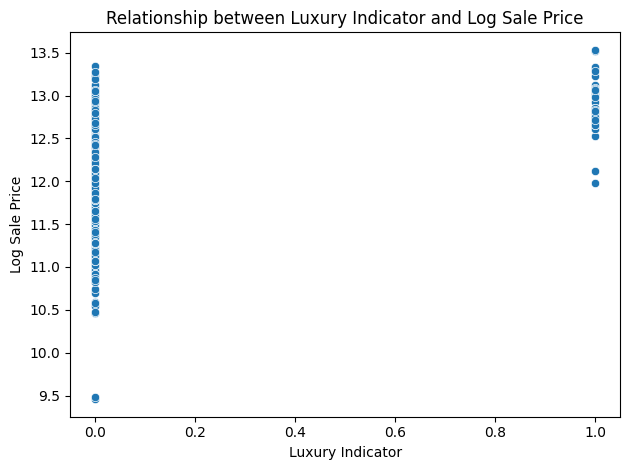

In [ ]:
## Scatterplot - ⁠Luxury Indicator


# Scatterplot to visualize the relationship between Luxury Indicator and Sale Price
sns.scatterplot(x='Luxury_Indicator',
                y='Sale_Price',
                data=housing_df)

# Add title and labels for the Sale Price analysis
plt.title('Relationship between Luxury Indicator and Sale Price')
plt.xlabel('Luxury Indicator')
plt.ylabel('Sale Price')

# Adjust layout for better spacing of elements
plt.tight_layout()

# Display the Sale Price scatterplot
plt.show()


# log_Sale_Price Analysis: Scatterplot to visualize the relationship between Luxury Indicator and Log Sale Price
sns.scatterplot(x='Luxury_Indicator',
                y='log_Sale_Price',
                data=housing_df)

# Add title and labels for the Log Sale Price analysis
plt.title('Relationship between Luxury Indicator and Log Sale Price')
plt.xlabel('Luxury Indicator')
plt.ylabel('Log Sale Price')

# Adjust layout for better spacing of elements
plt.tight_layout()

# Display the Log Sale Price scatterplot
plt.show()


**Correlation heatmap for Feature 3**

<br>

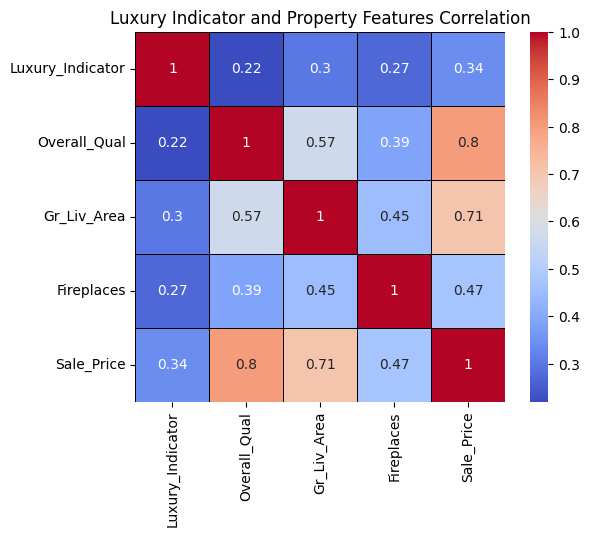

In [ ]:
## Correlations ##

### Luxury_Indicator and Sale_Price analysis
# Compute the Pearson correlation matrix
Luxury_Indicator_corr = housing_df.loc[:, ['Luxury_Indicator',
                                           'Overall_Qual',
                                           'Gr_Liv_Area',
                                           'Fireplaces',
                                           'Sale_Price']].corr(method='pearson').round(decimals=2)  # Calculate Pearson correlation and round to 2 decimals

# Create the heatmap to visualize the correlations
sns.heatmap(Luxury_Indicator_corr,
            cmap='coolwarm',
            square=True,
            annot=True,
            linecolor='black',
            linewidths=0.5)

# Add a title to the heatmap to describe the analysis being shown
plt.title("Luxury Indicator and Property Features Correlation")

# Display the heatmap
plt.show()






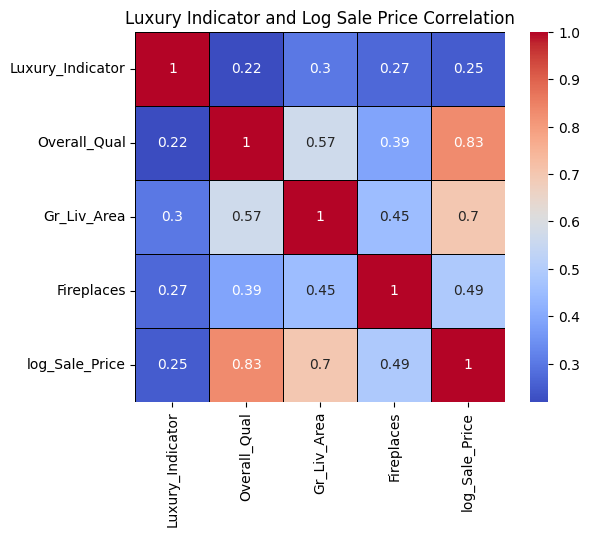

In [ ]:
### Luxury_Indicator and log_Sale_Price correlation analysis
# Compute correlation matrix between 'Luxury_Indicator', 'Overall_Qual', 'Gr_Liv_Area', 'Fireplaces', and 'log_Sale_Price'
Luxury_Indicator_corr = housing_df.loc[:, ['Luxury_Indicator',
                                           'Overall_Qual',
                                           'Gr_Liv_Area',
                                           'Fireplaces',
                                           'log_Sale_Price']].corr(method='pearson').round(decimals=2)

# Set up the heatmap
sns.heatmap(Luxury_Indicator_corr,
            cmap='coolwarm',
            square=True,
            annot=True,
            linecolor='black',
            linewidths=0.5)

# Add title to the heatmap for context
plt.title("Luxury Indicator and Log Sale Price Correlation")

# Display the heatmap
plt.show()


**Boxplot for Feature 3**

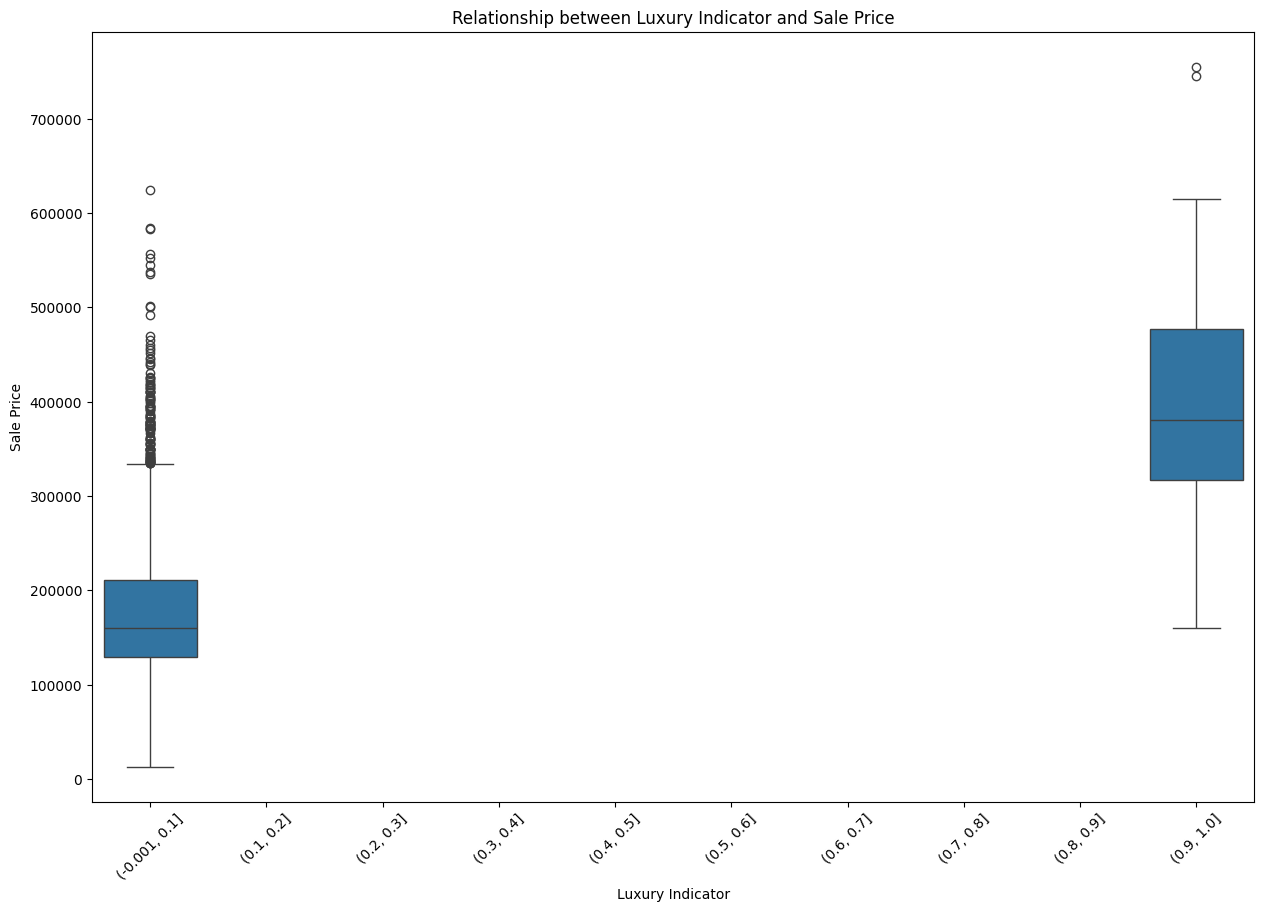

In [ ]:
# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))

#group into bins for better visualisation
housing_df['Luxury_Bins'] = pd.cut(housing_df['Luxury_Indicator'], bins=10)


# developing a boxplot
sns.boxplot(x='Luxury_Bins',
            y='Sale_Price',
            data=housing_df)



# titles and labels
plt.title(label   = 'Relationship between Luxury Indicator and Sale Price')
plt.xlabel(xlabel = 'Luxury Indicator')
plt.ylabel(ylabel = 'Sale Price')

# displaying the plot
plt.tight_layout
plt.xticks(rotation=45)
plt.show()

**Correlation matrix**

In [34]:
#Correlation matrix for new features

# Compute the Pearson correlation matrix between Luxury_Indicator, Total_Living_Area , Porch_Garage_Combined (Exterior)

# Select only numeric columns to avoid errors

numeric_cols = housing_df.select_dtypes(include=['number'])

# Compute the correlation matrix
new_corr = numeric_cols.corr(method='pearson').round(2)

# Extract correlations of 'Luxury_Indicator' with 'Sale_Price' and 'log_Sale_Price'
new_feature_corr = new_corr.loc[['Luxury_Indicator','Total_Living_Area','Porch_Garage_Combined'], ['Sale_Price', 'log_Sale_Price']]

# Display the result
print(new_feature_corr)

                       Sale_Price  log_Sale_Price
Luxury_Indicator             0.34            0.25
Total_Living_Area            0.79            0.78
Porch_Garage_Combined        0.66            0.67


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 4: Explain the Results</h3><br>
<strong>a)</strong> Did each engineered feature perform as expected? Why or why not? (minimum of 2 sentences per engineered feature)
<br><br>
<strong>b)</strong> What practical idea(s) do you have to help each engineered feature have a stronger linear relationship with either of the response variables? Do not write about collecting more data or performing transformations. (minimum of 3 sentences per engineered feature)

# **Total Living Area**

As expected, there is a strong positive correlation between Total Living Area and Sale Price (0.79), confirming that homes with larger livable spaces tend to be priced higher. Gomez (2022) states that home size and usable space are key factors in determining a property's value, as buyers prioritize functional living areas when assessing home prices. This aligns with the dataset results, where homes with greater livable space consistently have higher sale prices, reinforcing the importance of this feature in real estate valuation. "Livable space is what is most important to buyers and appraisers. Bedrooms and bathrooms are most highly valued, so the more beds and baths your home offers, the more your home is generally worth." (Gomez, 2022)

To strengthen the relationship between Total Living Area and Sale Price, one approach is to distinguish high-value living spaces such as bedrooms and bathrooms from general square footage. Buyers tend to place greater importance on rooms that directly contribute to daily living, making these areas more predictive of price than just raw square footage (Gomez, 2022). "Two homes with the same square footage can have drastically different values depending on how the space is used. Buyers pay for functional space, not just size." (Quiz, 2024) Another way to improve the correlation is to account for home layout efficiency, as two homes with the same total square footage can have different market values depending on how the space is distributed (Quiz, 2024). Additionally, including room count as a complementary feature could enhance the relationship, as homes with the same square footage but more bedrooms and bathrooms tend to be priced higher.

***References***  

Gomez, J. (2022, June 4). 8 critical factors that influence a home’s value. Opendoor. Retrieved January 27, 2025, from https://www.opendoor.com/articles/factors-that-influence-home-value

Quiz, K. (2024, September 13). The economics of home size: Is bigger always better? Concreit. Retrieved January 27, 2025, from https://www.concreit.com/blog/is-bigger-house-better


# **Total Exterior Space**  

As expected, there is a moderate positive correlation (0.66) between Porch and Garage Combined Area and Sale Price, confirming that homes with larger exterior spaces tend to be valued higher. Research on real estate pricing suggests that garages and porches enhance curb appeal and functionality, making homes more attractive to buyers (Ortega, 2024). The dataset reflects this trend, showing that properties with larger porches and garages generally sell for higher prices, reinforcing their importance in real estate valuation.  

To strengthen the relationship between Porch and Garage Combined Area and Sale Price, one approach is to differentiate between covered and uncovered porches, as covered porches provide greater usability and weather protection, making them more valuable to buyers. Another improvement would be to analyze multi-car garages separately, since homes with larger garages tend to attract buyers looking for additional storage and parking space. Additionally, considering detached vs. attached garages could refine the correlation, as attached garages are often seen as more convenient and desirable (Ortega, 2024).  
   
***References***  

Ortega, M. (2024, July 17). Exterior home upgrades that pay off when you sell. Zillow. Retrieved January 27, 2025, from https://www.zillow.com/learn/exterior-home-improvements/

# **Luxury Indicator**

The Luxury Indicator showed a weaker-than-expected correlation (0.34) with Sale Price. While premium features like fireplaces, high-quality construction (Overall_Qual ≥ 8), and larger living spaces (Gr_Liv_Area > 2000) contribute to higher sale prices, the relationship is not as strong as predicted. This suggests that while buyers appreciate luxury elements, factors like location, neighborhood desirability, and additional high-end amenities also influence pricing. According to US Fireplace Store (n.d.), fireplaces can increase home value by 6-12%, particularly in colder regions where they provide both functional and aesthetic appeal. However, the dataset suggests that luxury features alone don’t drive home prices as strongly as expected, indicating that buyers consider multiple factors when evaluating a property's worth.

To improve the relationship between Luxury Indicator and Sale Price, refining how high-end attributes are categorized would be beneficial. Instead of treating fireplace presence as binary, using the number of fireplaces would provide a more accurate measure of luxury, as multiple fireplaces are more common in high-end homes (US Fireplace Store, n.d.). These refinements would align more closely with market behavior, strengthening the relationship between luxury features and pricing
  
***References***  

US Fireplace Store. (n.d.). Will adding a fireplace increase my home’s value? Retrieved January 27, 2025, from https://usfireplacestore.com/blogs/learning-center/do-fireplaces-add-home-value






AI Reference

OpenAI. (2025). ChatGPT (Version 4) [Large language model]. Retrieved January 30, 2025, from https://chatgpt.com/share/679bc839-1898-8001-a64e-b0e3dbf4d864